**FOR3004 Tutorial 2: The Graphic Simplex Method and How to Solve Linear Programming Problems in Python and Excel**

This tutorial has three components. First, we will look at solving LP problems in Python using the Graphic Simplex method and SciPy. Then, we will see how to solve an LP problem in Excel. 

*Problem 1:* 

Maximize: 8x + 6y 

Subject to constraints: 

x + y <= 12

2x + y <= 16

2x + 3y <= 24

x, y >= 0

First, we will use the graphic simplex method to solve. This means solving the problem by graphing it. 

In [7]:
# First, we need to install the necessary "packages", basically pre-written
# code, that will help us do this. 

%pip install matplotlib
%pip install numpy
%pip install scipy==1.7.3

     |████████████████████████████████| 38.1 MB 331 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [8]:
# Now we need to import the packages
import matplotlib.pyplot as plt
import numpy as np 
import scipy 

In [9]:
# First, get a list of constant numbers that we will "feed" to the constraint
# equations so that the computer can plot them 

bounds = [-5,15,1000] 
X = np.linspace(bounds[0],bounds[1],bounds[2]) # 1000 values between -10 and 10


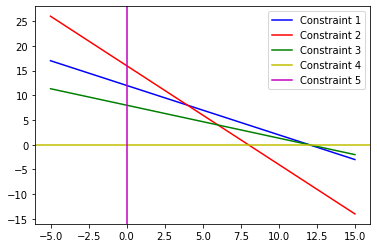

In [10]:
# Now we need to plot our equations. But to do this, we need to have Y on the 
# left hand side. It's just some simple re-arranging. Hint: pretend the 
# inequality is just an = sign! For the purposes of programming, we can't just
# name all the Y's Y, otherwise the computer will get confused. So, Y1, Y2, 
# etc. 

Y1 = 12-X
Y2 = 16-2*X
Y3 = (24/3)-(2/3)*X
X1 = 0 
Y4 = 0 

# Plot the constraints 
plt.plot(X,Y1,label='Constraint 1',c='b')
plt.plot(X,Y2,label='Constraint 2',c='r')
plt.plot(X,Y3,label='Constraint 3',c='g')
plt.axhline(X1,label='Constraint 4', c='y') # Horizontal line
plt.axvline(Y4,label='Constraint 5',color='m') # Vertical line 
plt.legend()
plt.show()

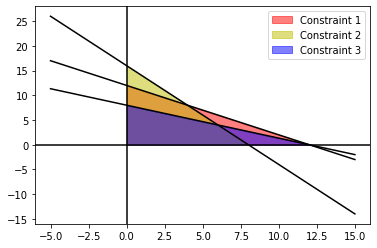

In [11]:
# Now we need to remember the constraints. The equations are inequalities, so
# for example, for constraint 1, the feasible area is <= 12. 

plt.plot(X,Y1,c='k')
plt.plot(X,Y2,c='k')
plt.plot(X,Y3,c='k')
plt.axhline(X1, c='k') # Horizontal line
plt.axvline(Y4,color='k') # Vertical line 

# Plot feasible area for each inequality 
plt.fill_between(X,Y1,where=(X<=12)&(X>=0)&(Y1>=0),color='r',alpha=0.5,
                label='Constraint 1') 
plt.fill_between(X,Y2,where=(X<=16)&(X>=0)&(Y2>=0),color='y',alpha=0.5,
                 label='Constraint 2') 
plt.fill_between(X,Y3,where=(X<=48)&(X>=0)&(Y3>=0),color='b',alpha=0.5,
                 label='Constraint 3') 

plt.legend()
plt.show()

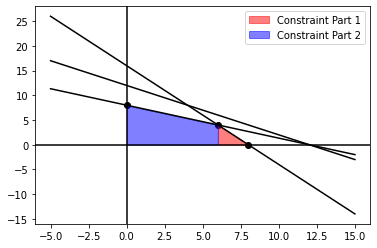

In [12]:
# Now, we can see the area where all the constraints are met. It's in dark 
# purple. This means our important equations for plotting are: Y3, Y2, and X=0
# and Y = 0. 

plt.plot(X,Y1,c='k')
plt.plot(X,Y2,c='k')
plt.plot(X,Y3,c='k')
plt.axhline(X1, c='k') # Horizontal line
plt.axvline(Y4,color='k') # Vertical line 

# Plot feasible area using points of intersection 
plt.scatter(8,0,c='k') # You can just estimate these visually 
plt.scatter(6,4,c='k')
plt.scatter(0,8,c='k')
plt.fill_between(X,Y2,where=(X>=0)&(Y2>=0)&(X<=8)&(Y2<=Y3),color='r',alpha=0.5,
                label='Constraint Part 1') 
plt.fill_between(X,Y3,where=(X>=0)&(Y2>=0)&(X<=6),color='b',alpha=0.5,
                label='Constraint Part 2') 

plt.legend()
plt.show()

But which of the three potential points (8,0), (6,4), and (0,8) is the solution?

You can just plug them into the original equation that you want to maximize to find which one gets the largest value. 

So: 

(A) (8,0)

8X + 6Y --> 8(8) + 6(0) = 64

(B) (6,4)

8X + 6Y --> 8(6) + 6(4) = 72

(C) (0,8)

8X + 6Y --> 8(0) + 6(8) = 48 

Therefore, the optimal solution for maximizing 8X + 6Y is (6,4). That means that the optimal value for X is 6 and for Y is 4. 

You are probably now thinking that this is a very inefficient method for solving LP problems with lots of constraints or with > 3 variables (obviously hard to visualize). So, how would we solve this problem computationally? 

In [13]:
# First, we need to import the linprog function from SciPy. Please see here for
# more details: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html

from scipy.optimize import linprog

# linprog is coded for minimization by default, not maximizing. 
# The solution is to multiply the coefficients of the objective function by 
# -1 to transform the operation from minimization to maximization 

coefficients = [8, 6]
inv_coefficients = [i*-1 for i in coefficients]

# Now, we need to set up the inputs to the linprog function. 

inequality_right = [[1,1],[2,1],[2,3]] # Do not multiply by -1 
inequality_left = [12,16,24]
X_bound = (0, None)
Y_bound = (0, None) 

# Now, we send the inputs to the function 
information = linprog(inv_coefficients, A_ub=inequality_right, 
                      b_ub=inequality_left, bounds=[X_bound, Y_bound], 
                      method='revised simplex')

print(information['x'])

[6. 4.]


In practice, linear programming problems are a lot more complicated than this! Let's work through a forestry example. 

*Problem 2:* A paper company has three mills and sells paper to four different cities. The three mills have annual production capacities of 4, 5 and 7 million tons of paper per year, respectively. The cities each require 4 million tons of paper per year. The cost of shipping a ton of paper includes a handling cost of 50 dollars, and a shipping cost of 0.05 dollars per ton kilometer. The distances from the mills to the cities  are shown in the table below. You must decide how many tons of paper should be shipped from each mill to each city
each year, so as to satisfy customer demand and **minimize shipping costs**.

Table 1: Distances from mills to cities in km. 

| | Sault Ste Marie  | North Bay   | Barrie   | Kingston   |
|---:|:-------------|:-----------|:------|:------|
| Sudbury Mill | 300  | 130       | 300   | 600     |
| Cornwall Mill | 900  | 500    | 520   | 180     |
| Timmins Mill | 500 | 360    | 600   | 800     |


More complicated, but we can sort of see what the computer should be selecting - the Timmins mill should not supply Kingston. Cornwall should - it is closer. Okay, let's get this into a format that a computer can understand. 

(A) First, define the objective function. 

Let d = distance from mill to city. 
Let P = Amount of paper shipped from mill to city.

Cost of shipping paper = 50 + 0.05d (Units: dollars + dollars per ton per km * km)

Cost for each mill-city combination: P(50+0.05d) (Units: dollars) 

Objective function: 

Minimize cost for each mill-city combination (Z). 

(B) Second, calculate the coefficients. We know the distance from each mill to each city, so we can plug this into P(50+0.5d) to get just P. Let's calculate this for each combination:

Table 2. Cost of shipping paper for each mill-city combination. 

| | Sault Ste Marie  | North Bay   | Barrie   | Kingston   |
|---:|:-------------|:-----------|:------|:------|
| Sudbury Mill | 50+0.05(300)=65  | 50+0.05(130)=56.6       | 50+0.05(300)=65   | 50+0.05(600)=80     |
| Cornwall Mill | 50+0.05(900)=95  | 50+0.05(500)=75    | 50+0.05(520)=76   | 50+0.05(180)=59     |
| Timmins Mill | 50+0.05(500)=75  | 50+0.05(360)=68    | 50+0.05(600)=80   | 50+0.05(800)=90     |

This table is giving us the coefficients of the objectize function. 

(C) Third, create the objective function. Notice that the subscripts correspond to the first letter of the mill location and the first letter of the city name. 

Minimize Cost (Z) = 65$P_{ss}$ + 56.6$P_{sn}$ + 65$P_{sb}$ + 80$P_{sk}$ + 95$P_{cs}$ + 75$P_{cn}$ + 76$P_{cb}$ + 59$P_{ck}$ + 75$P_{ts}$ + 68$P_{tn}$ + 80$P_{tb}$ + 90$P_{tk}$

That is our objective function. 

(D) Fourth, define the constraints. What are our constraints? 

- Annual production capacity 

The Sudbury Mill can only produce 4 million tons of paper per year: 
$P_{ss}$ + $P_{sn}$ + $P_{sb}$ + $P_{sk}$ <= 4

The Cornwall Mill can only produce 5 million tons of paper per year: 
$P_{cs}$ + $P_{cn}$ + $P_{cb}$ + $P_{ck}$ <= 5

The Timmins Mill can produce more, a maximum of 7 million tons of paper per year: 
$P_{ts}$ + $P_{tn}$ + $P_{tb}$ + $P_{tk}$ <= 7 

- Demand for paper in the city that must be met 

The cities of Sault Ste Marie, North Bay, Barrie, and Kingston have each ordered 4 million tons of paper. You must meet this demand: 

$P_{ss}$ +  $P_{cs}$  + $P_{ts}$ == 4
$P_{sn}$ +  $P_{cn}$ + $P_{tn}$ == 4
$P_{sb}$ + $P_{cb}$ + $P_{tb}$ == 4
$P_{sk}$ + $P_{ck}$ + $P_{tk}$ == 4

- You cannot deliver "negative" tons of paper, so all P (amount of paper) must be positive (greater pr equal to 0) 

$P_{ss}$, $P_{sn}$, $P_{sb}$, $P_{sk}$ >= 0 

$P_{cs}$, $P_{cn}$, $P_{cb}$, $P_{ck}$ >= 0 

$P_{ts}$, $P_{tn}$, $P_{tb}$, $P_{tk}$ >= 0 

Now we have all our constraints! 

(E) Let's send this information to the computer to find how much paper should be sent from each mill to each city. 

In [14]:
# First, make a list of the coefficients of the objective function: 

coefficients = [65, 56.6, 65, 80, 95, 75, 76, 59, 75, 68, 80, 90]

# Then, make a list of the inequality left coefficients (all ones!)

inequality_left = [[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
                   [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], 
                   [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]]

# Make a list of the right side number of the inequalities 
inequality_right = [4, 5, 7]

# Set up the equality constraints list (left hand side)

equality_left = [[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 
                 [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], 
                 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]]

# Make a list of the right side number of the equality 

equality_right = [4, 4, 4, 4]

# Make a list of the bounds of each unknown P 

bounds_P = [(0,None)]*12 

# Send to the optimizer 
information = linprog(coefficients, A_ub=inequality_left, b_ub=inequality_right, 
                      A_eq = equality_left, b_eq = equality_right,
                      bounds=bounds_P, method='revised simplex')

# Print answer 
print(information['x'])


[0. 1. 3. 0. 0. 0. 1. 4. 4. 3. 0. 0.]


How do we interpret this answer? 

$P_{ss}$ = 0

$P_{sn}$ = 1

$P_{sb}$ = 3 

$P_{sk}$ = 0

$P_{cs}$ = 0

$P_{cn}$ = 0

$P_{cb}$ = 1 

$P_{ck}$ = 4

$P_{ts}$ = 4

$P_{tn}$ = 3

$P_{tb}$ = 0

$P_{tk}$ = 0 

Thus, the Sudbury Mill will supply 1 million tons of paper to North Bay and 3 million tons of paper to Barrie. The Cornwall Mill will supply 1 million tons of paper to Barrie and 4 million tons to Kingston. The Timmins Mill will supply 4 million tons of paper to Sault Ste Marie and 3 million to North Bay. 

Does this make sense geographically? Yes! The mills supply to the closest cities. 

This results in a total cost of delivery of: 

Cost (Z) = 65(0)  + 56.6(1)  + 65(3)  + 80(0) + 95(0)  + 75(0)  + 76(1)  + 59(4)  + 75(4)  + 68(3)  + 80(0)  + 90(0)

Z = 1067.6 million dollars* 

*It is millions of dollars because we were working in millions of tons. 

What if we want to solve a similar problem but with different city-mill combinations? Different costs per ton of paper to deliver? Let's make things easy for us and create a function! This is a way to make the computer easily solve problems for us with very little work on our part. 

In [15]:
def calculate_coefficient(handling_cost,cost_to_deliver_ton,city_information,\
                          mills): 
  '''
  Calculate the coefficients for each unknown (i.e. mill-city combination)
  '''
  coefficient_list = [] # Empty list to store the coefficients in 
  pair_list = [] 
  distance_list = [] 
  dict_check = {} 
  count = 0 
  mills_list = list(mills.keys())*len(city_information)
  for key,val in city_information.items(): # Key = City name, Val = Distance

    distance_from_mill = city_information[key][0] #Get distance
    for j in distance_from_mill: #For each distance to each mill 
      coefficient = handling_cost + cost_to_deliver_ton*j #Calculate coefficient
      coefficient_list.append(coefficient) #Send it to the empty list above
      pair_list.append(key)
      distance_list.append(j)
      mill = mills_list[count]
      dict_check[count] = [key,mill,j,coefficient]
      count+=1
  return coefficient_list,pair_list, distance_list,dict_check # "Return" the list, which means it can be used by
                          # the other function 
  
def minimize_mill_costs(handling_cost,cost_to_deliver_ton,city_information,
                        mill_capacity): 
  '''
  Solve the LP problem for amount of paper provided by each mill to each city
  '''

  coefficients,pairs,dist,dict_1 = calculate_coefficient(handling_cost,cost_to_deliver_ton,
                                       city_information,mill_capacity) # Calculate coefficients
  #print(dict_1)
  #print(coefficients)
  #print(pairs)

  num_mills = len(list(mill_capacity.keys())) # Get number of mills 
  num_coefficients = len(coefficients) # Get number of coefficients
  num_cities = len(list(city_information.keys())) # Get number of cities 

  equality_left = [] # Make an empty list to store the left inequalities in 
  
  # Create the matrix for coefficients for the unknowns
  count = 0  
  for n in range(0,num_cities): 
    equality_left_prep = [[0]*num_coefficients]*num_cities
    #print(inequality_left_prep)
    stop = num_mills + count 
    for i in range(count,stop): 
      equality_left_prep[n][i] = 1 
    count += num_mills
    equality_left.append(equality_left_prep[0])

  # Make a list of the right side number of the inequalities 
  inequality_right = [] 
  for key, val in mill_capacity.items(): 
    inequality_right.append(val)

  
  # Create the matrix for coefficients for the unknowns for the equalities
  inequality_left = [] 
  for n in range(0,num_mills): 
    inequality_left_prep = [[0]*num_coefficients]*num_mills
    for i in range(n,len(coefficients),num_mills): 
      inequality_left_prep[n][i] = 1 
    inequality_left.append(inequality_left_prep[0])

  # Make a list of the right side number of the equalities
  equality_right = [] 
  for key, val in city_information.items(): 
    paper_ordered = city_information[key][1]
    equality_right.append(paper_ordered)


  # Define the bounds 
  bounds_P = [(0,None)]*num_coefficients 

  # Run linprog

  information = linprog(coefficients, A_ub= inequality_left, 
                        b_ub= inequality_right, A_eq = equality_left, 
                        b_eq = equality_right,bounds=bounds_P, 
                        method='interior-point') #revised-simplex
  # Output relevent information
  num_paper = information['x']
  cities = list(city_information.keys())
  mills = list(mill_capacity.keys())*len(cities)
  ct = list(city_information.keys())*len(mills)
  mills_list = [[mill]*len(cities) for mill in mills] 
  mills_list = [j for i in mills_list for j in i]
  #print(num_paper)
  #print(pairs)
  for key, val in dict_1.items(): 
    print('City: %s, Mill: %s, Distance: %s, Coefficient: %s, Paper Tons: %s'\
          %(val[0],val[1],val[2],val[3],round(num_paper[key])))

  

*Problem 3:* A paper company has four mills and sells paper to four different cities. The four mills have annual production capacities of 6 million tons of paper per year. The cities each require 6 million tons of paper per year. The cost of shipping a ton of paper includes a handling cost of 60 dollars, and a shipping cost of 0.07 dollars per ton kilometer. The distances from the mills to the cities  are shown in the table below. You must decide how many tons of paper should be shipped from each mill to each city
each year, so as to satisfy customer demand and **minimize shipping costs**.

Table 1: Distances from mills to cities in km. 

| | Thunder Bay  | Ottawa   | Gananoque   | Windsor   |
|---:|:-------------|:-----------|:------|:------|
| Wawa Mill | 480  | 1000       | 1100   | 800     |
| Sarnia Mill | 1300  | 680    | 560   | 100     |
| Petawawa Mill | 1300 | 160    | 250   | 740     |
| Cobourg Mill | 1500 | 340    | 180   | 480     |

Prediction: we want Wawa to supply Thunder Bay, Sarnia to supply Windsor, Petawawa to supply Ottawa, and Cobourg to supply Gananoque. Does our program support our prediction? 

In [16]:
handling = 60
delivery = 0.07
city_info = {'Thunder Bay':[[480,1300,1300,1500],6],'Ottawa':
                    [[1000,680,160,340],6],'Gananoque':[[1100,560,250,180],6],
                    'Windsor':[[800,100,740,480],6]}
mill_cap = {'Wawa':6,'Sarnia':6,'Petawawa':6,'Cobourg':6} 
minimize_mill_costs(handling,delivery,city_info,mill_cap)

City: Thunder Bay, Mill: Wawa, Distance: 480, Coefficient: 93.6, Paper Tons: 6
City: Thunder Bay, Mill: Sarnia, Distance: 1300, Coefficient: 151.0, Paper Tons: 0
City: Thunder Bay, Mill: Petawawa, Distance: 1300, Coefficient: 151.0, Paper Tons: 0
City: Thunder Bay, Mill: Cobourg, Distance: 1500, Coefficient: 165.0, Paper Tons: 0
City: Ottawa, Mill: Wawa, Distance: 1000, Coefficient: 130.0, Paper Tons: 0
City: Ottawa, Mill: Sarnia, Distance: 680, Coefficient: 107.6, Paper Tons: 0
City: Ottawa, Mill: Petawawa, Distance: 160, Coefficient: 71.2, Paper Tons: 6
City: Ottawa, Mill: Cobourg, Distance: 340, Coefficient: 83.8, Paper Tons: 0
City: Gananoque, Mill: Wawa, Distance: 1100, Coefficient: 137.0, Paper Tons: 0
City: Gananoque, Mill: Sarnia, Distance: 560, Coefficient: 99.2, Paper Tons: 0
City: Gananoque, Mill: Petawawa, Distance: 250, Coefficient: 77.5, Paper Tons: 0
City: Gananoque, Mill: Cobourg, Distance: 180, Coefficient: 72.6, Paper Tons: 6
City: Windsor, Mill: Wawa, Distance: 800, 

Our prediction was correct! That was an easy one. Let's try a more difficult one. This is for you to solve in the breakout rooms. 



*Problem 4:* A paper company has five mills and sells paper to two different cities. The five mills have annual production capacities of 2 million tons of paper per year. The cities each require 5 million tons of paper per year. The cost of shipping a ton of paper includes a handling cost of 100 dollars, and a shipping cost of 0.03 dollars per ton kilometer. The distances from the mills to the cities  are shown in the table below. You must decide how many tons of paper should be shipped from each mill to each city
each year, so as to satisfy customer demand and **minimize shipping costs**.

Table 1: Distances from mills to cities in km. 

| | London  | Belleville   |
|---:|:-------------|:-----------|
| Haliburton Mill | 390  | 175       |
| Minden Mill | 365  | 200    | 
| Bancroft Mill | 419 | 112    | 
| Huntsville Mill | 376 | 269    | 
| Bracebridge Mill | 341 | 259    | 

The mills are all really close together and generally closer to Belleville. How much paper should each mill supply to each city so that the costs of delivery are minimized? Try to figure it out in groups in the breakout room, using the tool of your choice. 

In [17]:
# Comment out %%capture to see the correct answer! 
#%%capture 
handling = 100
delivery = 0.03
city_info = {'London':[[390,365,419,376,341],5],
             'Belleville':[[175,200,112,269,259],5]}
mill_cap = {'Haliburton':2,'Minden':2,'Bancroft':2,'Huntsville':2,
            'Bracebridge':2} 

minimize_mill_costs(handling,delivery,city_info,mill_cap) 

City: London, Mill: Haliburton, Distance: 390, Coefficient: 111.7, Paper Tons: 0
City: London, Mill: Minden, Distance: 365, Coefficient: 110.95, Paper Tons: 1
City: London, Mill: Bancroft, Distance: 419, Coefficient: 112.57, Paper Tons: 0
City: London, Mill: Huntsville, Distance: 376, Coefficient: 111.28, Paper Tons: 2
City: London, Mill: Bracebridge, Distance: 341, Coefficient: 110.23, Paper Tons: 2
City: Belleville, Mill: Haliburton, Distance: 175, Coefficient: 105.25, Paper Tons: 2
City: Belleville, Mill: Minden, Distance: 200, Coefficient: 106.0, Paper Tons: 1
City: Belleville, Mill: Bancroft, Distance: 112, Coefficient: 103.36, Paper Tons: 2
City: Belleville, Mill: Huntsville, Distance: 269, Coefficient: 108.07, Paper Tons: 0
City: Belleville, Mill: Bracebridge, Distance: 259, Coefficient: 107.77, Paper Tons: 0
